In [1]:
from pathlib import Path
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [2]:
path_merged= Path('/Users/khashayarzare/2018_df1.csv')
merged_df= pd.read_csv(path_merged)
merged_df.tail()

,income,gpa_new,class ranking,age,coop,inst_rep,student_loan,gender,year_grad,"occup_Business, finance and administration occupations",...,program_Humanities,"program_Mathematics, computer and information sciences",program_Other,program_Physical and life sciences and technologies,program_Social and behavioural sciences and law,"program_Visual and performing arts, and communications technologies",cert_lvl_Bachelor's,cert_lvl_College,cert_lvl_Master's / Doctorate,certification_level
19250,4,0,3,4,2,1,1,2,0,0,...,0,0,0,0,1,0,0,1,0,1
19251,3,0,3,1,2,1,1,2,0,0,...,0,0,0,0,0,1,1,0,0,2
19252,6,0,2,1,2,1,0,2,0,0,...,0,0,0,0,0,0,0,0,1,3
19253,5,0,3,1,2,1,1,2,0,0,...,0,0,0,0,0,0,0,1,0,1
19254,3,0,1,1,2,0,1,2,0,0,...,0,0,0,0,0,1,1,0,0,2


In [3]:
merged_df.columns

Index(['income', 'gpa_new', 'class ranking', 'age', 'coop', 'inst_rep',
       'student_loan', 'gender', 'year_grad',
       'occup_Business, finance and administration occupations',
       'occup_Health occupations', 'occup_Management occupations',
       'occup_Natural and applied sciences and related occupations',
       'occup_Occupations in art, culture, recreation and sport',
       'occup_Occupations,education,law,social,community and gov services',
       'occup_Sales and service occupations',
       'occup_Trades,transport,equipment operators and related occupations',
       'program_Architecture, engineering, and related technologies',
       'program_Business, management and public administration',
       'program_Education', 'program_Humanities',
       'program_Mathematics, computer and information sciences',
       'program_Other', 'program_Physical and life sciences and technologies',
       'program_Social and behavioural sciences and law',
       'program_Visual and pe

In [4]:
x = merged_df[['gpa_new','class ranking', 'age', 'coop', 'inst_rep', 'student_loan','certification_level', 'gender', 'year_grad'] + 
           list(merged_df.columns[merged_df.columns.str.startswith('occup_')]) + 
           list(merged_df.columns[merged_df.columns.str.startswith('program_')])]
#           list(merged_df.columns[merged_df.columns.str.startswith('cert_lvl_')])]
y= merged_df[['income']]
x= sm.add_constant(x)
ols_model= sm.OLS(y, x).fit(cov_type='HC3')
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     153.1
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:22:46   Log-Likelihood:                -42911.
No. Observations:               19255   AIC:                         8.588e+04
Df Residuals:                   19228   BIC:                         8.609e+04
Df Model:                          26                                         
Covariance Type:                  HC3                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [5]:
x = merged_df[['gpa_new','class ranking', 'age', 'coop', 'inst_rep', 'student_loan', 'gender', 'year_grad'] + 
           list(merged_df.columns[merged_df.columns.str.startswith('occup_')]) + 
           list(merged_df.columns[merged_df.columns.str.startswith('program_')]) +  
           list(merged_df.columns[merged_df.columns.str.startswith('cert_lvl_')])]
y = merged_df[['income']]
x = sm.add_constant(x)
ols_model = sm.OLS(y, x).fit(cov_type='HC3')
print(ols_model.summary())


                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.164
Method:                 Least Squares   F-statistic:                     144.0
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:22:46   Log-Likelihood:                -42884.
No. Observations:               19255   AIC:                         8.583e+04
Df Residuals:                   19226   BIC:                         8.605e+04
Df Model:                          28                                         
Covariance Type:                  HC3                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

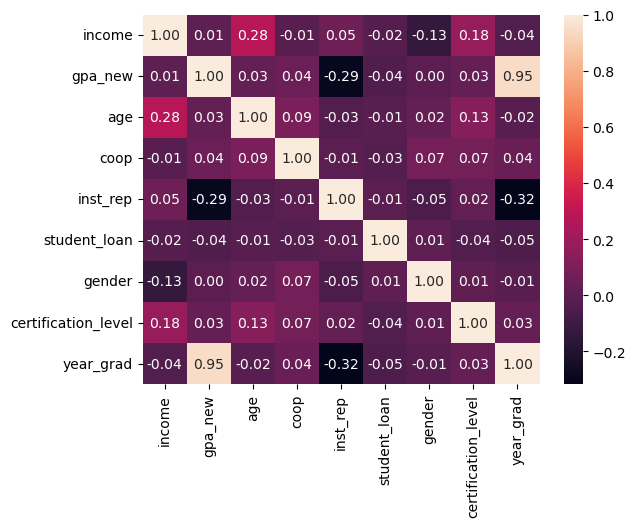

In [6]:
corrMatrix= merged_df[['income', 'gpa_new','age', 'coop', 'inst_rep', 'student_loan','gender','certification_level', 'year_grad']].corr()
sns.heatmap(corrMatrix, annot=True, fmt=".2f") 
plt.show()

In [7]:
# Vif for correlation 
vif_data = pd.DataFrame()
vif_data["Variable"] = x.columns
vif_data["VIF"] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]

print(vif_data)

                                             Variable         VIF
0                                               const  291.180384
1                                             gpa_new    9.980150
2                                       class ranking    3.949060
3                                                 age    1.088851
4                                                coop    1.030317
5                                            inst_rep    1.125115
6                                        student_loan    1.009062
7                                              gender    1.067301
8                                           year_grad   13.198750
9   occup_Business, finance and administration occ...    7.182757
10                           occup_Health occupations    7.161329
11                       occup_Management occupations    3.808102
12  occup_Natural and applied sciences and related...    6.638940
13  occup_Occupations in art, culture, recreation ...    3.064495
14  occup_

In [8]:
#VIF shows a high multicolinearity here so I am dropping variables that have a vif >10 ( a common threashold) for 
#more robust results 
def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(len(df.columns))]
    return vif_data

# Drop variables with VIF > 10
while True:
    vif_data = calculate_vif(x)
    max_vif = vif_data['VIF'].max()
    if max_vif > 10:
        drop_variable = vif_data.loc[vif_data['VIF'] == max_vif, 'Variable'].iloc[0]
        print(f"Dropping {drop_variable} with VIF = {max_vif}")
        x = x.drop(columns=[drop_variable])
    else:
        break

# Fit the OLS model again
ols_model = sm.OLS(y, x).fit(cov_type='HC3')
print(ols_model.summary())

Dropping const with VIF = 291.18038447460526
Dropping cert_lvl_Bachelor's with VIF = 32.112542560305776
Dropping coop with VIF = 26.197615638179304
Dropping year_grad with VIF = 23.359093769374095
Dropping gender with VIF = 10.726785369100725
                                 OLS Regression Results                                
Dep. Variable:                 income   R-squared (uncentered):                   0.860
Model:                            OLS   Adj. R-squared (uncentered):              0.860
Method:                 Least Squares   F-statistic:                              5098.
Date:                Tue, 16 Apr 2024   Prob (F-statistic):                        0.00
Time:                        12:22:57   Log-Likelihood:                         -43624.
No. Observations:               19255   AIC:                                  8.730e+04
Df Residuals:                   19231   BIC:                                  8.749e+04
Df Model:                          24                

In [9]:
merged_df.columns

Index(['income', 'gpa_new', 'class ranking', 'age', 'coop', 'inst_rep',
       'student_loan', 'gender', 'year_grad',
       'occup_Business, finance and administration occupations',
       'occup_Health occupations', 'occup_Management occupations',
       'occup_Natural and applied sciences and related occupations',
       'occup_Occupations in art, culture, recreation and sport',
       'occup_Occupations,education,law,social,community and gov services',
       'occup_Sales and service occupations',
       'occup_Trades,transport,equipment operators and related occupations',
       'program_Architecture, engineering, and related technologies',
       'program_Business, management and public administration',
       'program_Education', 'program_Humanities',
       'program_Mathematics, computer and information sciences',
       'program_Other', 'program_Physical and life sciences and technologies',
       'program_Social and behavioural sciences and law',
       'program_Visual and pe

In [10]:

# Create a new column for the combined certification level
merged_df['certification_level'] = 0

# Assign values based on the one-hot encoded columns
merged_df.loc[merged_df['cert_lvl_College'] == 1, 'certification_level'] = 1
merged_df.loc[merged_df["cert_lvl_Bachelor's"] == 1, 'certification_level'] = 2
merged_df.loc[merged_df["cert_lvl_Master's / Doctorate"] == 1, 'certification_level'] = 3

# Drop the one-hot encoded columns if no longer needed
#df_13_new.drop(['cert_lvl_College or CEGEP diploma or certificate', 'cert_lvl_BA degree, 1st prof. degree, university dip./cert. below BA', "cert_lvl_Master's degree, doctorate, university dip./cert. above BA"], axis=1, inplace=True)


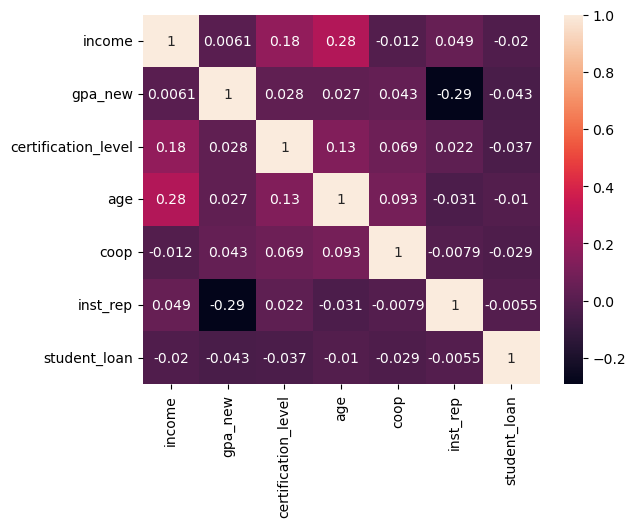

In [11]:
corrMatrix= merged_df[['income', 'gpa_new','certification_level','age', 'coop', 'inst_rep', 'student_loan']].corr()
sns.heatmap(corrMatrix, annot=True) 
plt.show()

In [12]:
x = merged_df[['gpa_new','class ranking', 'age', 'coop', 'inst_rep', 'student_loan','certification_level' ,'gender', 'year_grad'] + 
           list(merged_df.columns[merged_df.columns.str.startswith('occup_')]) + 
           list(merged_df.columns[merged_df.columns.str.startswith('program_')])]
y= merged_df[['income']]
x= sm.add_constant(x)
ols_model= sm.OLS(y, x).fit(cov_type='HC3')
print(ols_model.summary())

                            OLS Regression Results                            
Dep. Variable:                 income   R-squared:                       0.163
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     153.1
Date:                Tue, 16 Apr 2024   Prob (F-statistic):               0.00
Time:                        12:22:57   Log-Likelihood:                -42911.
No. Observations:               19255   AIC:                         8.588e+04
Df Residuals:                   19228   BIC:                         8.609e+04
Df Model:                          26                                         
Covariance Type:                  HC3                                         
                                                                          coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------

In [13]:
#prof said put the certification level back together lol
merged_df['certification_level'] = 0 


# Assign values based on the one-hot encoded columns
merged_df.loc[merged_df['cert_lvl_College'] == 1, 'certification_level'] = 1
merged_df.loc[merged_df["cert_lvl_Bachelor's"] == 1, 'certification_level'] = 2
merged_df.loc[merged_df["cert_lvl_Master's / Doctorate"] == 1, 'certification_level'] = 3


In [14]:
#merged_df.to_csv('2018_df1.csv', index=False)